In [7]:
%matplotlib inline
import pdb
import sys
import pandas as pd
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import matplotlib
import scipy.signal as sg
import math
import scipy as sp
import socket
import os

matplotlib.style.use('ggplot')

comp_name=socket.gethostname()
if  comp_name == 'Ezequiels-MacBook-Pro.local':
    print 'Computer: ' + comp_name
    sys.path.append('/Users/zeke/experiment/ephysDataManagement/ephysScripts')
    experiment_folder = os.path.join('/Users','zeke','experiment')
else:
    print 'Computer: ' + 'server'
    sys.path.append('/experiment/ephysDataManagement/ephysScripts')
    experiment_folder = os.path.join('/','experiment')
    
import unitToolsv2
from data_handling import ephys_names as en
from data_handling.basic_plot import decim, plot_raster, make_psth
from data_handling import data_load as dl

Computer: server


In [2]:
mouse = 'ZKawakeM72'
sess  = 27
rec   = 'a'
fn = en.file_names(mouse,sess,rec,root=experiment_folder)

In [3]:
mat_file = os.path.join(fn.fold_exp_data,'ZKawakeM72_027_006_cell.mat')
r=dl.load_cell(mat_file, as_dict=True)
print r.keys()

['ZKawakeM72_027_e_006']


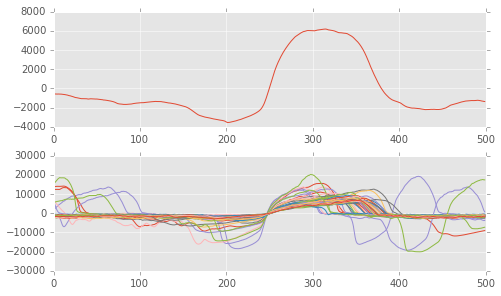

In [4]:
#Load a baseline sniff file
mat_file = os.path.join(fn.fold_exp_data,'ZKawakeM72_027_e_trialsBase.mat')

sniffs= dl.load_sniff_base(mat_file, as_dict=False)
#plot all the baseline sniffs
snif_plot = plt.figure()
all_ax = snif_plot.add_axes([0, 0, 1, .4])
avg_ax = snif_plot.add_axes([0, .5, 1, .4])

t=np.arange(0, 450, 1)
avg_line = avg_ax.plot(np.average(-sniffs['flow'][250:750,:],axis=1))
lines=all_ax.plot(-sniffs['flow'][250:750,:50])

['ZKawakeM72_010_c_001', 'ZKawakeM72_010_b_001']


(-500, 2500)

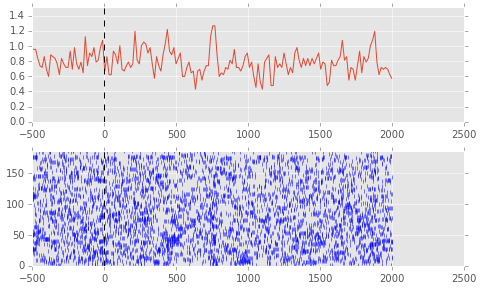

In [5]:
#load the spikes baseline raster file
'ZKawakeM72_010_001_cell.mat'
mat_file = os.path.join(fn.fold_exp_data,'ZKawakeM72_010_001_spikesBase.mat')

bases = dl.load_baseline(mat_file)
print bases.keys()
spikes = [bases[a_key] for a_key in bases.keys()]

#spikes = load_baseline(mat_file, as_dict = False)
#print spikes
#print spikes[0]['u_id']
#print spikes[0]['id']

sr_spikes = spikes[0]['spikes']
sr_t0 = spikes[0]['t_0']

#plot all the baseline sniffs
sr_plot = plt.figure()
ras_ax  = sr_plot.add_axes([0, 0, 1, .4])
hist_ax = sr_plot.add_axes([0, .5, 1, .4])
t0 = 500
t1 = 0
t2= 2500
bin_size=10

#plot the raster
lines,_ = plot_raster(sr_spikes,t0=t0,t1=t1,t2=t2,ax=ras_ax)
ras_ax.set_xlim(-500,2500)

#the psth
hist_line, hist_ax = plot_raster(sr_spikes,t0=t0, t1=t1,t2=t2, bin_size=15, ax=hist_ax)
#hist_ax.set_ylim(0.9,1.1)
hist_ax.set_xlim(-500,2500)

In [4]:
# get all the cells
cells_path = fn.fold_exp_data
records = dl.load_cells(cells_path)

['KPawakeM72_014_a_001']
/experiment/export_data/KPawakeM72_014_a_trial.mat
['KPawakeM72_014_a_004']
['KPawakeM72_014_a_006']
['KPawakeM72_014_a_007']
['KPawakeM72_014_c_012', 'KPawakeM72_014_b_012']
/experiment/export_data/KPawakeM72_014_c_trial.mat
/experiment/export_data/KPawakeM72_014_b_trial.mat
['KPawakeM72_014_b_017']
['KPawakeM72_016_a_001']
/experiment/export_data/KPawakeM72_016_a_trial.mat
['KPawakeM72_016_a_005']
['KPawakeM72_016_a_006']
['KPawakeM72_016_a_007']
['KPawakeM72_016_a_008']
['KPawakeM72_016_a_009']
['KPawakeM72_016_a_012']
['KPawakeM72_016_a_016']
['KPawakeM72_016_a_019']
['KPawakeM72_016_a_020']
['KPawakeM72_016_a_025']
['KPawakeM72_019_b_003']
/experiment/export_data/KPawakeM72_019_b_trial.mat
['KPawakeM72_019_b_004']
['KPawakeM72_019_a_007', 'KPawakeM72_019_d_007', 'KPawakeM72_019_b_007']
/experiment/export_data/KPawakeM72_019_a_trial.mat
/experiment/export_data/KPawakeM72_019_d_trial.mat
['KPawakeM72_019_d_010', 'KPawakeM72_019_a_010']
['KPawakeM72_019_a_013

In [27]:
records['responses'].keys()

['KPawakeM72_016_a_023',
 'ZKawakeM72_009_a_005',
 'KPawakeM72_016_a_021',
 'KPawakeM72_016_a_020',
 'ZKawakeM72_009_a_001',
 'KPawakeM72_016_a_025',
 'ZKawakeM72_009_a_002',
 'KPawakeM72_021_b_023',
 'KPawakeM72_021_b_026',
 'KPawakeM72_021_b_028',
 'KPawakeM72_021_b_029',
 'ZKawakeM72_010_f_004',
 'ZKawakeM72_009_a_003',
 'KPawakeM72_019_a_001',
 'ZKawakeM72_022_e_003',
 'ZKawakeM72_020_f_013',
 'KPawakeM72_016_a_018',
 'KPawakeM72_016_a_019',
 'KPawakeM72_016_a_016',
 'KPawakeM72_016_a_017',
 'ZKawakeM72_004_e_010',
 'KPawakeM72_016_a_012',
 'KPawakeM72_016_a_010',
 'KPawakeM72_016_a_011',
 'ZKawakeM72_012_a_012',
 'ZKawakeM72_012_a_013',
 'ZKawakeM72_012_a_010',
 'ZKawakeM72_012_a_011',
 'ZKawakeM72_027_d_004',
 'ZKawakeM72_004_g_015',
 'ZKawakeM72_004_d_007',
 'ZKawakeM72_004_d_006',
 'ZKawakeM72_004_d_008',
 'KPawakeM72_021_a_013',
 'ZKawakeM72_004_i_001',
 'KPawakeM72_016_a_009',
 'KPawakeM72_016_a_008',
 'KPawakeM72_019_b_021',
 'KPawakeM72_019_b_020',
 'ZKawakeM72_020_g_019',


In [5]:
## plot the psth of an odor, by odorName and concentration
def conc_compare(conc1, conc2, tolerance=1.5):
    return 1./float(tolerance) < float(conc1)/float(conc2) and float(conc1)/float(conc2) < float(tolerance)

odor_name = ['2-hydroxyacetophenone','2hydroxyacetophenone']
odor_conc = 0.0051
cell_id = 'ZKawakeM72_020_c_001'
#get the rec
a_record = records['responses'][cell_id]
print a_record['rec_id']
print a_record['odor_resp'].keys()
#get the indexes of the trials with this odor
this_odor_conc = get_odor_trials(a_record['odor_resp'], odor
#plot the psth
#


ZKawakeM72_020_c
['spikes', 'odors', 'concs', 't_2', 't_0', 't_1', 'trialId']


(0, 4.2580645161290311)

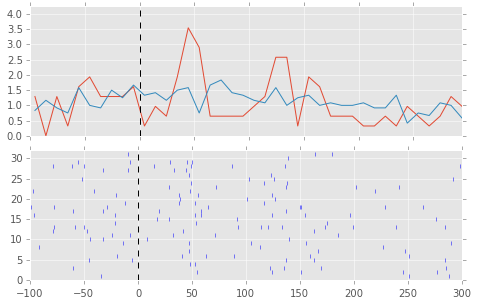

In [16]:
# plot a raster for a record, odor, concentration
# the record was selected, the type of response was selected.
# entered: 
response = a_record['odor_resp']

sr_spikes = response['spikes'][this_odor_conc,:]
sr_t0     = response['t_0']
sr_t1     = response['t_1']
sr_t2     = response['t_2']

#pre and post stimulus windows
t_pre  = 100;
t_post = 300;

#plot the psth
sr_plot = plt.figure()
ras_ax  = sr_plot.add_axes([0, 0, 1, .45])
hist_ax = sr_plot.add_axes([0, .5, 1, .45])

t0=t_pre
t1 = -sr_t1-t_pre
t2=t_post-sr_t1
bin_size=10

#plot the raster
lines,_ = plot_raster(sr_spikes,t0=t0,t1=t1,t2=t2,ax=ras_ax)
ras_ax.set_xlim(-t0,t2-t1-t0)

#the psth
hist_line, hist_ax = plot_raster(sr_spikes,t0=t0, t1=t1,t2=t2, bin_size=bin_size, ax=hist_ax)
psth = make_psth(sr_spikes,t0=t0, t1=t1,t2=t2, bin_size=bin_size)
#hist_ax.set_ylim(0.9,1.1)
hist_ax.set_xlim(-t0,t2-t1-t0)
hist_ax.set_xticklabels([])

#the baseline
#get the baseline for the cell
baseline = records['baselines'][a_record['meta']['id']]
bl_spikes = baseline['spikes']
#plot it
bl_t0     = baseline['t_0']
bl_t1     = baseline['t_1']
bl_t2     = baseline['t_2']
t0=t_pre
t1 = -bl_t1-t_pre
t2=t_post-bl_t1
base_line, hist_ax = plot_raster(bl_spikes,t0=t0, t1=t1,t2=t2, bin_size=bin_size, ax=hist_ax)

hist_ax.set_ylim(0,max(psth[0])*1.2)

In [59]:
a_record['odor_resp']['concs'][3]

0.0012144000502303243

In [29]:
h_cells = dl.cells_for_odor(records['responses'],['2-hydroxyacetophenone'],0.0051)
h_cells.keys()

['KPawakeM72_016_a_023',
 'ZKawakeM72_009_a_005',
 'KPawakeM72_016_a_021',
 'KPawakeM72_016_a_020',
 'ZKawakeM72_009_a_001',
 'ZKawakeM72_009_a_003',
 'ZKawakeM72_009_a_002',
 'KPawakeM72_021_b_023',
 'KPawakeM72_021_b_026',
 'KPawakeM72_021_b_028',
 'KPawakeM72_021_b_029',
 'ZKawakeM72_010_f_004',
 'KPawakeM72_016_a_025',
 'ZKawakeM72_022_e_003',
 'KPawakeM72_016_a_018',
 'KPawakeM72_016_a_019',
 'KPawakeM72_016_a_016',
 'KPawakeM72_016_a_017',
 'ZKawakeM72_004_e_010',
 'KPawakeM72_016_a_012',
 'KPawakeM72_016_a_010',
 'KPawakeM72_016_a_011',
 'ZKawakeM72_012_a_012',
 'ZKawakeM72_012_a_013',
 'ZKawakeM72_012_a_010',
 'ZKawakeM72_012_a_011',
 'KPawakeM72_021_a_010',
 'ZKawakeM72_004_d_007',
 'ZKawakeM72_004_d_006',
 'ZKawakeM72_004_d_008',
 'KPawakeM72_021_a_013',
 'ZKawakeM72_011_c_012',
 'KPawakeM72_016_a_009',
 'KPawakeM72_016_a_008',
 'KPawakeM72_019_b_021',
 'KPawakeM72_019_b_020',
 'KPawakeM72_021_a_016',
 'KPawakeM72_016_a_001',
 'ZKawakeM72_011_b_010',
 'ZKawakeM72_011_b_011',


In [111]:
odor_conc = 0.0051

In [15]:
hlitral = dl.cells_by_tag(records['responses'], light=1, odor=1)
hlitral.keys()

['ZKawakeM72_027_d_004',
 'KPawakeM72_817_f_001',
 'ZKawakeM72_006_a_001',
 'ZKawakeM72_020_f_014',
 'KPawakeM72_016_a_016',
 'KPawakeM72_019_b_002',
 'KPawakeM72_021_b_001',
 'ZKawakeM72_012_a_001',
 'ZKawakeM72_005_a_001',
 'KPawakeM72_021_a_001',
 'ZKawakeM72_012_a_002',
 'KPawakeM72_014_b_012',
 'ZKawakeM72_011_d_001',
 'ZKawakeM72_020_g_001',
 'ZKawakeM72_020_d_001',
 'ZKawakeM72_010_b_001',
 'KPawakeM72_016_a_018',
 'ZKawakeM72_004_i_001',
 'ZKawakeM72_004_i_002',
 'ZKawakeM72_022_d_001',
 'ZKawakeM72_013_e_011',
 'ZKawakeM72_013_e_010',
 'ZKawakeM72_013_f_010',
 'ZKawakeM72_027_e_004',
 'ZKawakeM72_004_h_001',
 'ZKawakeM72_020_c_001',
 'ZKawakeM72_004_h_002',
 'KPawakeM72_817_e_001',
 'KPawakeM72_019_a_001']

In [22]:
is_odor= [True, True, False, True, False]
is_conc= [False, True, False, True, True]

In [26]:
not type(is_odor) is list

False

In [30]:
records.keys()
h_cells.keys()

['KPawakeM72_016_a_023',
 'ZKawakeM72_009_a_005',
 'KPawakeM72_016_a_021',
 'KPawakeM72_016_a_020',
 'ZKawakeM72_009_a_001',
 'ZKawakeM72_009_a_003',
 'ZKawakeM72_009_a_002',
 'KPawakeM72_021_b_023',
 'KPawakeM72_021_b_026',
 'KPawakeM72_021_b_028',
 'KPawakeM72_021_b_029',
 'ZKawakeM72_010_f_004',
 'KPawakeM72_016_a_025',
 'ZKawakeM72_022_e_003',
 'KPawakeM72_016_a_018',
 'KPawakeM72_016_a_019',
 'KPawakeM72_016_a_016',
 'KPawakeM72_016_a_017',
 'ZKawakeM72_004_e_010',
 'KPawakeM72_016_a_012',
 'KPawakeM72_016_a_010',
 'KPawakeM72_016_a_011',
 'ZKawakeM72_012_a_012',
 'ZKawakeM72_012_a_013',
 'ZKawakeM72_012_a_010',
 'ZKawakeM72_012_a_011',
 'KPawakeM72_021_a_010',
 'ZKawakeM72_004_d_007',
 'ZKawakeM72_004_d_006',
 'ZKawakeM72_004_d_008',
 'KPawakeM72_021_a_013',
 'ZKawakeM72_011_c_012',
 'KPawakeM72_016_a_009',
 'KPawakeM72_016_a_008',
 'KPawakeM72_019_b_021',
 'KPawakeM72_019_b_020',
 'KPawakeM72_021_a_016',
 'KPawakeM72_016_a_001',
 'ZKawakeM72_011_b_010',
 'ZKawakeM72_011_b_011',


In [34]:
records['responses'].keys()

['KPawakeM72_016_a_023',
 'ZKawakeM72_009_a_005',
 'KPawakeM72_016_a_021',
 'KPawakeM72_016_a_020',
 'ZKawakeM72_009_a_001',
 'KPawakeM72_016_a_025',
 'ZKawakeM72_009_a_002',
 'KPawakeM72_021_b_023',
 'KPawakeM72_021_b_026',
 'KPawakeM72_021_b_028',
 'KPawakeM72_021_b_029',
 'ZKawakeM72_010_f_004',
 'ZKawakeM72_009_a_003',
 'KPawakeM72_019_a_001',
 'ZKawakeM72_022_e_003',
 'ZKawakeM72_020_f_013',
 'KPawakeM72_016_a_018',
 'KPawakeM72_016_a_019',
 'KPawakeM72_016_a_016',
 'KPawakeM72_016_a_017',
 'ZKawakeM72_004_e_010',
 'KPawakeM72_016_a_012',
 'KPawakeM72_016_a_010',
 'KPawakeM72_016_a_011',
 'ZKawakeM72_012_a_012',
 'ZKawakeM72_012_a_013',
 'ZKawakeM72_012_a_010',
 'ZKawakeM72_012_a_011',
 'ZKawakeM72_027_d_004',
 'ZKawakeM72_004_g_015',
 'ZKawakeM72_004_d_007',
 'ZKawakeM72_004_d_006',
 'ZKawakeM72_004_d_008',
 'KPawakeM72_021_a_013',
 'ZKawakeM72_004_i_001',
 'KPawakeM72_016_a_009',
 'KPawakeM72_016_a_008',
 'KPawakeM72_019_b_021',
 'KPawakeM72_019_b_020',
 'ZKawakeM72_020_g_019',


In [32]:
h_cells.keys()

['KPawakeM72_016_a_023',
 'ZKawakeM72_009_a_005',
 'KPawakeM72_016_a_021',
 'KPawakeM72_016_a_020',
 'ZKawakeM72_009_a_001',
 'ZKawakeM72_009_a_003',
 'ZKawakeM72_009_a_002',
 'KPawakeM72_021_b_023',
 'KPawakeM72_021_b_026',
 'KPawakeM72_021_b_028',
 'KPawakeM72_021_b_029',
 'ZKawakeM72_010_f_004',
 'KPawakeM72_016_a_025',
 'ZKawakeM72_022_e_003',
 'KPawakeM72_016_a_018',
 'KPawakeM72_016_a_019',
 'KPawakeM72_016_a_016',
 'KPawakeM72_016_a_017',
 'ZKawakeM72_004_e_010',
 'KPawakeM72_016_a_012',
 'KPawakeM72_016_a_010',
 'KPawakeM72_016_a_011',
 'ZKawakeM72_012_a_012',
 'ZKawakeM72_012_a_013',
 'ZKawakeM72_012_a_010',
 'ZKawakeM72_012_a_011',
 'KPawakeM72_021_a_010',
 'ZKawakeM72_004_d_007',
 'ZKawakeM72_004_d_006',
 'ZKawakeM72_004_d_008',
 'KPawakeM72_021_a_013',
 'ZKawakeM72_011_c_012',
 'KPawakeM72_016_a_009',
 'KPawakeM72_016_a_008',
 'KPawakeM72_019_b_021',
 'KPawakeM72_019_b_020',
 'KPawakeM72_021_a_016',
 'KPawakeM72_016_a_001',
 'ZKawakeM72_011_b_010',
 'ZKawakeM72_011_b_011',


In [41]:
print h_cells['KPawakeM72_014_a_001'].keys()
h_cells['KPawakeM72_014_a_001']['rec_id']
h_cells['KPawakeM72_014_a_001']['meta']

['meta', 'rec_id', 'odor_resp', 'light_resp']


{'comment': 'single spike with high jitter to only very highest power light, not really good odor responses',
 'id': 'KPawakeM72_014_a_001',
 'light': 0,
 'mouse': 'KPawakeM72',
 'odor': 0,
 'quality': 1,
 'rec': 'a',
 'sess': 14,
 'sessCell': 1,
 'u_id': 'KPawakeM72_014_001'}

In [42]:
records.keys()

['trials', 'base_sniff', 'responses', 'baselines']

In [44]:
records['base_sniff'][h_cells['KPawakeM72_014_a_001']['rec_id']].keys()

['phase', 'start', 'trial_uid', 'flow', 'rec_id']

In [50]:
records['trials'][h_cells['KPawakeM72_014_a_001']['rec_id']].keys()

['start',
 'sess',
 'sniff_zero',
 'sniff_flow',
 'rec',
 'mouse',
 'odor',
 'rec_id',
 'odor_c',
 'odor_t']

In [51]:
resp = h_cells['KPawakeM72_014_a_001']['odor_resp']

In [52]:
resp.keys()

['spikes', 'odors', 'concs', 't_2', 't_0', 't_1', 'trialId']